In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import zipfile
import os


# Define the path to the zip file and the extraction directory
zip_file_path = "/content/drive/MyDrive/Required_files_plant_disease/archive (2).zip"
extract_dir = "/content"

# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")


Successfully extracted '/content/drive/MyDrive/Required_files_plant_disease/archive (2).zip' to '/content'


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


True
Tesla T4


In [ ]:
train='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [ ]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Data Preprocessinh
#Training Image Preprocessing
training_set=tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",#multi class folders
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [ ]:
#validation image preprocessing
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",#multi class folders
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)


Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[ 91.5   83.    80.25]
   [ 94.25  86.    83.5 ]
   [ 94.25  85.75  83.25]
   ...
   [ 97.75  89.75  91.75]
   [ 97.    89.5   91.  ]
   [ 96.75  89.25  90.75]]

  [[178.5  169.5  164.5 ]
   [182.5  173.5  168.5 ]
   [179.5  170.5  165.5 ]
   ...
   [189.   180.   183.  ]
   [187.75 178.75 181.75]
   [191.75 182.75 185.75]]

  [[178.25 169.25 164.25]
   [186.5  177.5  172.5 ]
   [181.75 172.75 167.75]
   ...
   [186.75 177.75 180.75]
   [183.75 174.75 177.75]
   [188.5  179.5  182.5 ]]

  ...

  [[177.25 168.25 163.25]
   [182.   173.   168.  ]
   [181.   172.   167.  ]
   ...
   [180.75 172.75 170.75]
   [191.   183.   181.  ]
   [173.25 165.25 163.25]]

  [[176.75 167.75 162.75]
   [171.25 162.25 157.25]
   [182.   173.   168.  ]
   ...
   [186.25 178.25 176.25]
   [172.   164.   162.  ]
   [192.75 184.75 182.75]]

  [[162.25 153.25 148.25]
   [188.75 179.75 174.75]
   [175.25 166.25 161.25]
   ...
   [188.5  180.5  178.5 ]
   [181.   173.   171.  ]
   [209.25 201.25 19

#To avoid overshooting
1.choose small learning rate default is 0.001 we are taking 0.0001

2.There may be a chance of underfitting so increase number of neurons

3.Add more convolution layer to extract more features from images there may be possibility that model unable to capture relavant feature or model is confusing due to lack of feature so feed with more feature




In [ ]:
#building a model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()

In [ ]:
## building convolution layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25))#to avoid overfitting

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation='relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
#output layer
model.add(Dense(units=38,activation='softmax'))

In [ ]:
#compiling model
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(#to avoid overshooting
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## model training
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)
#loss is increasing due to overshooting loss function

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 168s 70ms/step - accuracy: 0.3984 - loss: 2.1207 - val_accuracy: 0.8467 - val_loss: 0.4878
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.8435 - loss: 0.4953 - val_accuracy: 0.9103 - val_loss: 0.2833
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 63ms/step - accuracy: 0.9111 - loss: 0.2780 - val_accuracy: 0.9442 - val_loss: 0.1736
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 148s 66ms/step - accuracy: 0.9395 - loss: 0.1878 - val_accuracy: 0.9276 - val_loss: 0.2213
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 147s 67ms/step - accuracy: 0.9545 - loss: 0.1385 - val_accuracy: 0.9556 - val_loss: 0.1409
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 201s 67ms/step - accuracy: 0.9658 - loss: 0.1011 - val_accuracy: 0.9622 - val_loss: 0.1245
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9710 - loss: 0.0857 - val_accuracy: 0.9582 - val_loss: 0.1394
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 

In [ ]:
#Model Evaluation
#model evaluation on training set
train_loss,train_acc=model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 58s 26ms/step - accuracy: 0.9892 - loss: 0.0323
Training accuracy: 0.9903407096862793


In [ ]:
print(train_loss,train_acc)

0.03019130602478981 0.9903407096862793


In [ ]:
#model evaluation on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9681 - loss: 0.1074


In [ ]:
print(val_loss,val_acc)

0.11161293834447861 0.9679604172706604


# Saving the model


In [ ]:
model.save('trained_model.keras')

In [ ]:
training_history.history

{'accuracy': [0.6008108854293823,
  0.8654385209083557,
  0.918472170829773,
  0.9443345665931702,
  0.9570097327232361,
  0.967366099357605,
  0.9720748066902161,
  0.9770538210868835,
  0.9799700975418091,
  0.9819759726524353],
 'loss': [1.3487048149108887,
  0.4264914393424988,
  0.2552441358566284,
  0.17320840060710907,
  0.13015571236610413,
  0.0984157845377922,
  0.08385012298822403,
  0.07096347957849503,
  0.061913710087537766,
  0.05620560050010681],
 'val_accuracy': [0.8467448353767395,
  0.910254955291748,
  0.9442294836044312,
  0.9276121258735657,
  0.9555543065071106,
  0.9622126221656799,
  0.958172082901001,
  0.9714318513870239,
  0.9670498371124268,
  0.9679604172706604],
 'val_loss': [0.48779553174972534,
  0.28332847356796265,
  0.17357900738716125,
  0.22131234407424927,
  0.14087463915348053,
  0.12446816265583038,
  0.1394299864768982,
  0.08975229412317276,
  0.10672267526388168,
  0.11161297559738159]}

In [ ]:
#recording history in json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

Accuracy visualization

In [ ]:
training_history.history['accuracy']

[0.6008108854293823,
 0.8654385209083557,
 0.918472170829773,
 0.9443345665931702,
 0.9570097327232361,
 0.967366099357605,
 0.9720748066902161,
 0.9770538210868835,
 0.9799700975418091,
 0.9819759726524353]

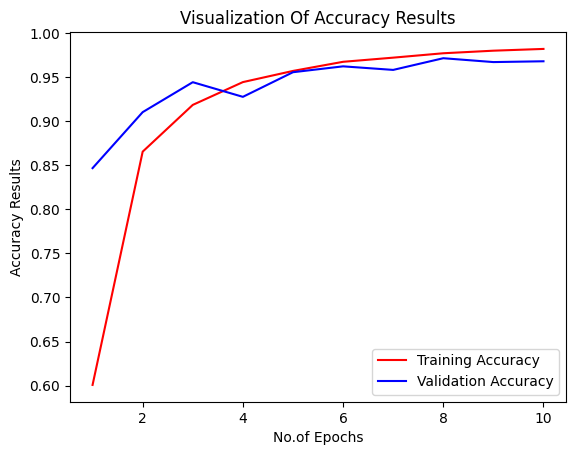

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No.of Epochs")
plt.ylabel("Accuracy Results")
plt.title("Visualization Of Accuracy Results")
plt.legend()
plt.show()

In [ ]:
#Some other metrics for model evalution
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [ ]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step


(array([[1.00000000e+00, 1.09753927e-12, 5.86319391e-14, ...,
         5.78136899e-19, 1.44584336e-18, 1.48800048e-17],
        [9.99999642e-01, 3.73948041e-07, 3.35555403e-11, ...,
         5.21447172e-18, 2.21486685e-15, 1.48667379e-15],
        [1.00000000e+00, 2.34553879e-17, 5.69277950e-19, ...,
         9.42109558e-28, 8.12247002e-24, 1.23652829e-21],
        ...,
        [1.00341215e-10, 1.75495545e-12, 2.44781395e-09, ...,
         1.08690862e-10, 1.09498990e-11, 9.99999166e-01],
        [1.00805870e-08, 8.88332602e-11, 3.22320446e-08, ...,
         1.95575165e-08, 1.89071114e-09, 9.99983311e-01],
        [3.39795249e-19, 6.96634306e-21, 7.11983666e-19, ...,
         1.79513541e-20, 8.29426460e-19, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories=tf.concat([y for x,y in test_set],axis=0)

In [ ]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.96      0.95       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.95      1.00      0.97       440
                                   Apple___healthy       0.99      0.94      0.96       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [ ]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[486,   7,   0, ...,   0,   1,   0],
       [  0, 496,   0, ...,   0,   0,   0],
       [  0,   0, 438, ...,   0,   0,   1],
       ...,
       [  0,   0,   2, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 439,   0],
       [  5,   0,   0, ...,   0,   0, 473]])

In [ ]:
#Confusion matrix visualization

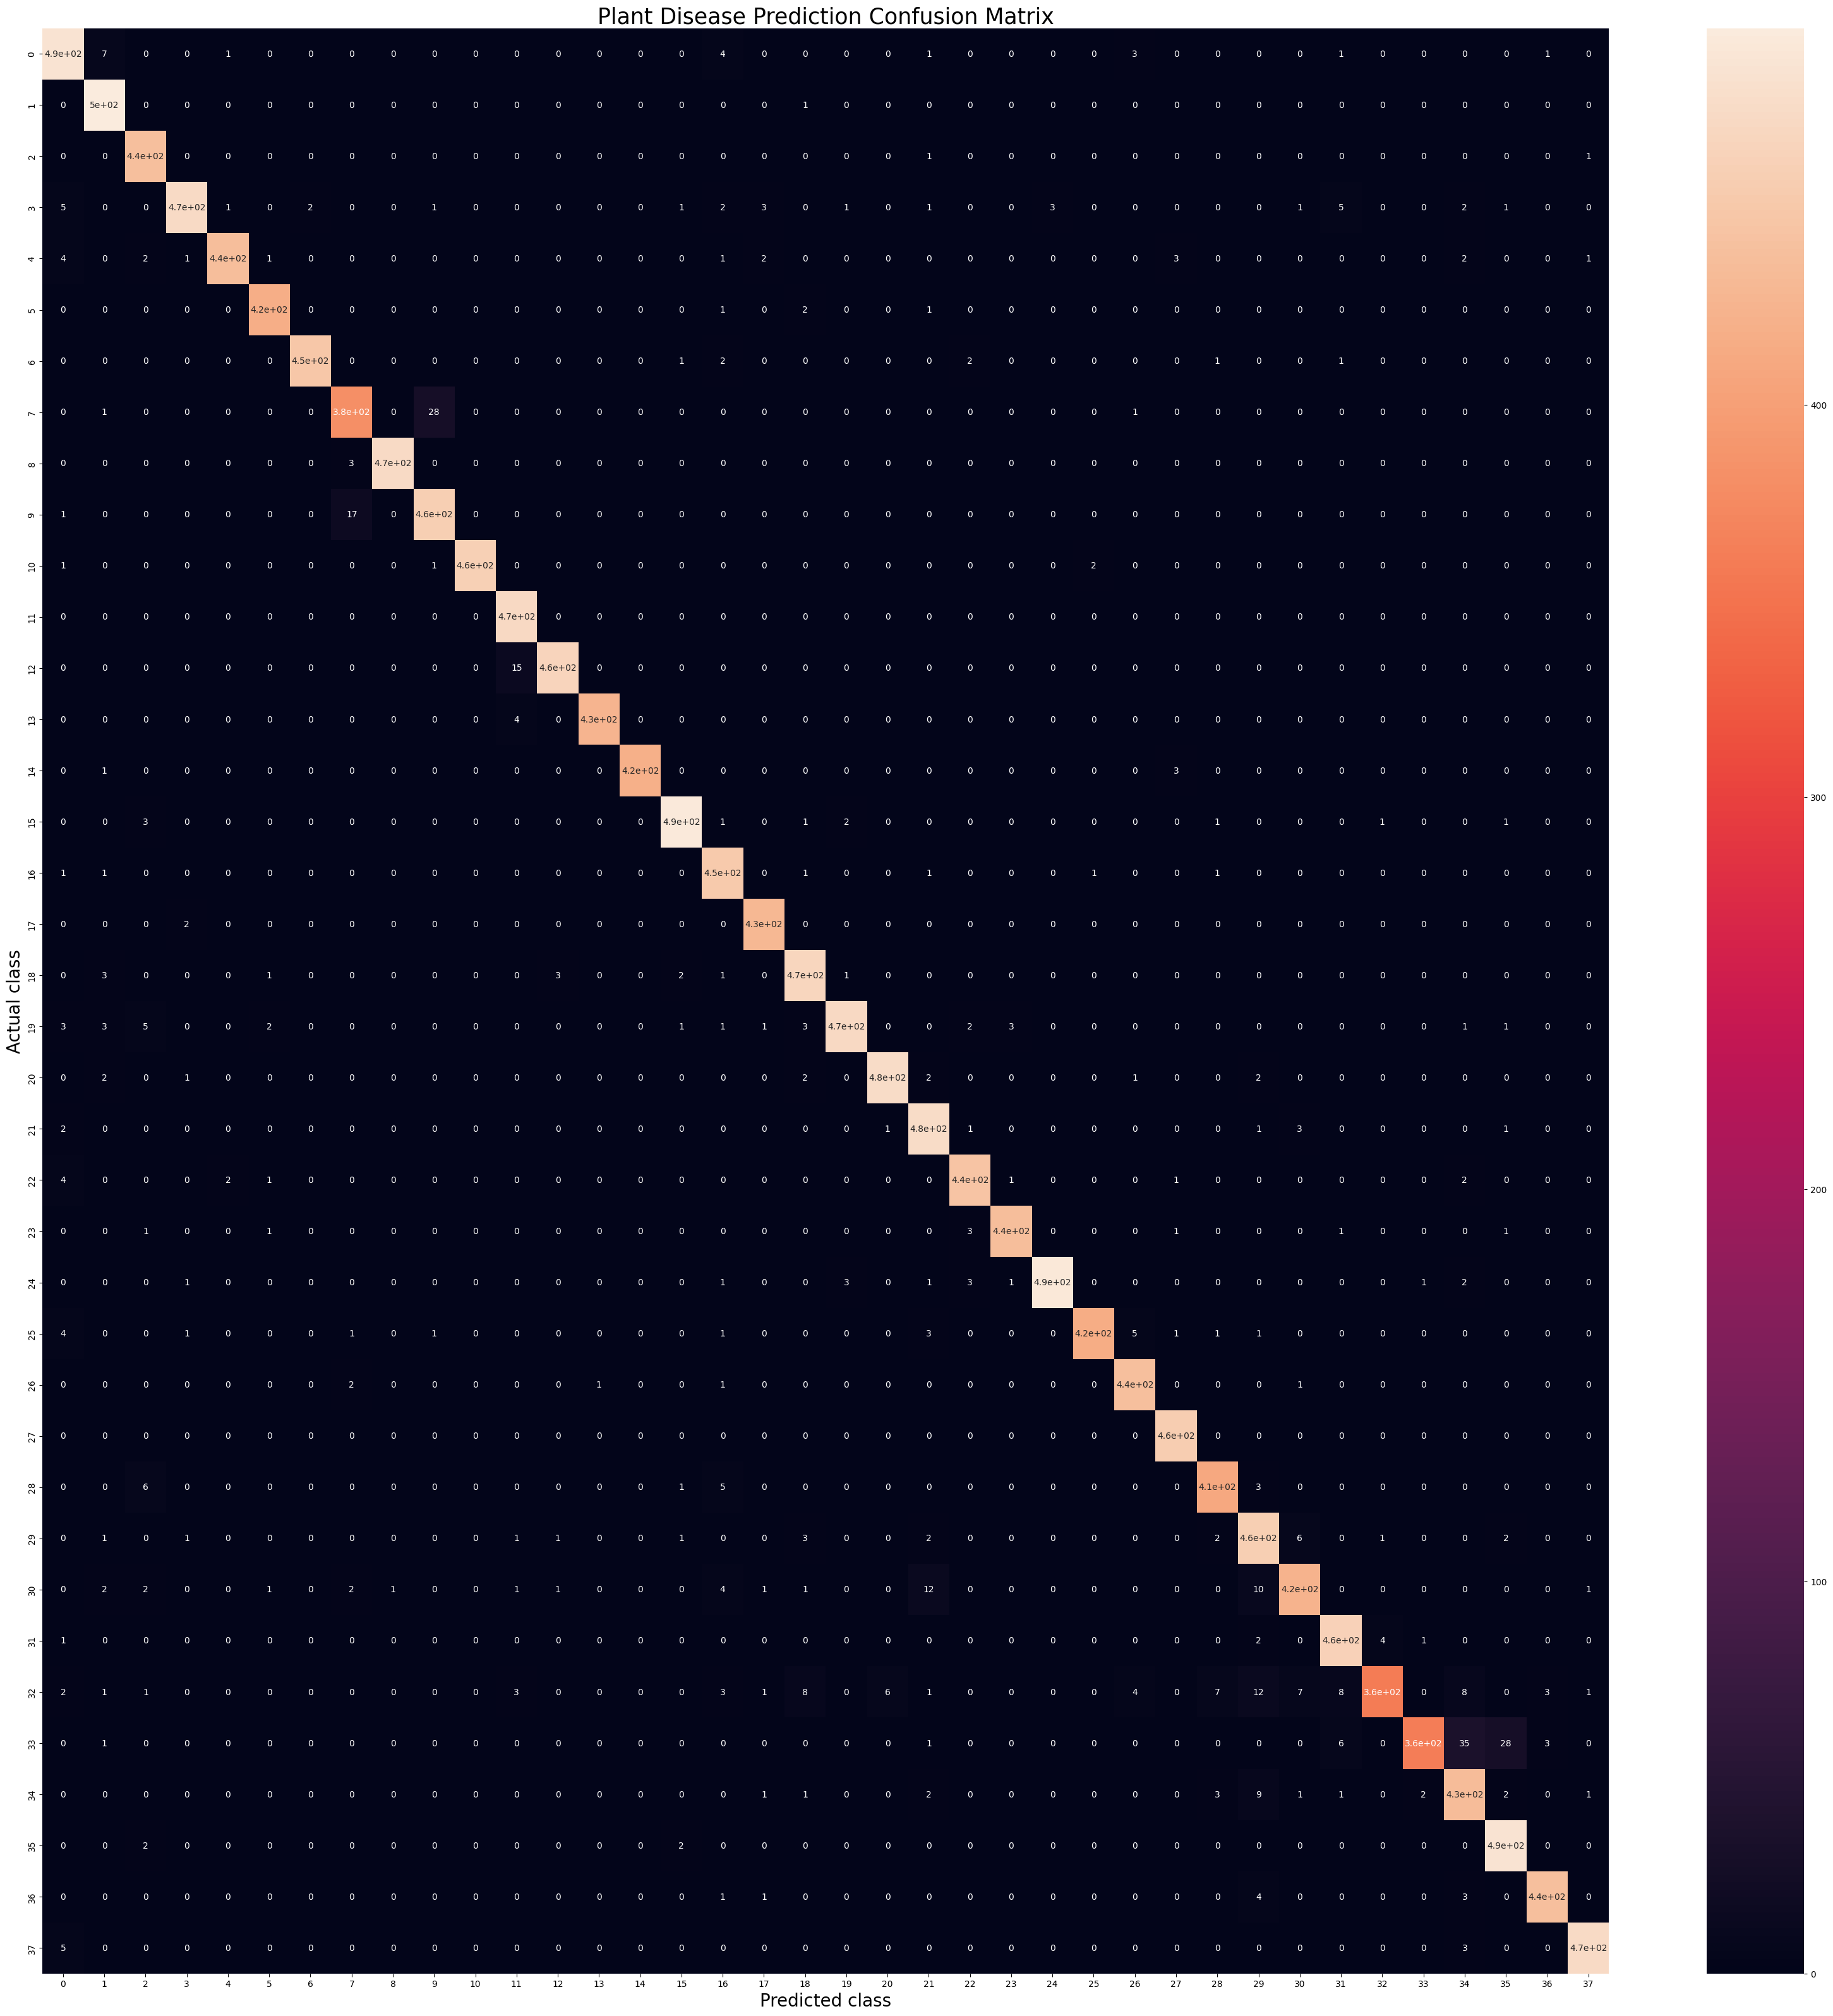

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

#Testing Plant disease

In [ ]:
#importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#Loading Model
model=tf.keras.models.load_model("/content/trained_model.keras")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

In [ ]:
#Visualize single image of the test set
import cv2

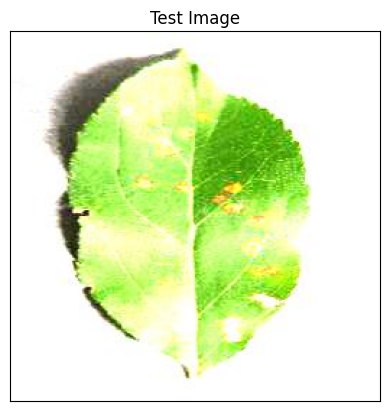

In [ ]:
image_path = "/content/test/test/AppleCedarRust1.JPG"
#reading image
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#converting BGR img to RGB img

#Displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()



#Testing Model

In [ ]:
#preprocess in the same way as our model is trained
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])#converting single image into a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [ ]:
prediction=model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


(array([[6.7392099e-17, 1.6944790e-13, 1.0000000e+00, 1.7870662e-20,
         7.9132244e-14, 2.2844583e-17, 3.2991061e-18, 7.6093115e-16,
         7.7885866e-20, 3.5902418e-18, 2.9045119e-22, 3.3252781e-15,
         5.8708052e-17, 1.2069682e-20, 4.0539450e-19, 4.9166906e-16,
         4.0114469e-16, 5.8732947e-16, 1.4960206e-16, 1.2656714e-16,
         1.0733693e-19, 1.6666306e-21, 4.0983557e-18, 3.7822728e-17,
         3.0279019e-19, 1.8890905e-18, 1.2541601e-17, 2.9844857e-19,
         4.8444128e-14, 2.3582698e-17, 3.8395974e-15, 9.0718800e-18,
         1.9972612e-14, 3.5573440e-19, 1.3705934e-13, 7.5596386e-15,
         1.7718289e-18, 4.5299315e-17]], dtype=float32),
 (1, 38))

In [ ]:
result_index=np.argmax(prediction)
result_index

2

In [ ]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

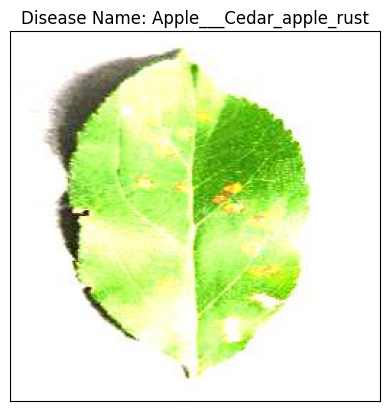

In [ ]:
#displaying result of the disease prediction
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
model_prediction

'Apple___Cedar_apple_rust'